 # Homework 5
 ## by Franklin marsh
 ### Math0154 Computational Statistics 
 #### with Prof. Gabe Chandler

Read http://www.mit.edu/~ilkery/papers/GibbsSampling.pdf

Write code to both generate from the process described.  

Then perform a Gibbs sampler routine to perform Bayesian inference with your data.  (Note that a discrete uniform routine needs to be used for the posterior conditional for n).  All the details are given in the paper.  
Write a half page to a page (not including graphics) to talk about how this works. 

The posterior distribution that we are trying to infer is 

$$p(\lambda_{1},\lambda_{2}, n|x_{1:N}) \propto p(x_{1:n}|\lambda_{1})p(x_{n+1:N}|\lambda_{2})p(\lambda_{1})p(\lambda_{2})p(n) $$ 

In [1]:
set.seed(12345)

The parameter that we are trying to infer is the change-point of a function that draws observations from two distributions.

This function will draw $N$ observations from two distributions - one with scale $a$, and one with scale $b$. The function will switch distributions at some point $n < N$, which will be randomly selected.

In [83]:
#define generating function parameters
N <- 100
a <- 2
b <- 1

#select n
#n <- sample((1:N),1)
n <- 50

We will now generate the array of lambda values, which has length $N$

In [90]:
lambda1 <- rgamma(1, shape = 1, scale = 1.0/b) #the lambdas up until the changepoint
lambda2 <- rgamma(1, shape = 1, scale = 1.0/b) #the lambdas after the changepoint

In [91]:
x_a <- rpois(n, lambda = lambda1) #this generates the observations up to the turning point
x_b <- rpois(N-n, lambda = lambda2) #
x <- c(x_a, x_b)

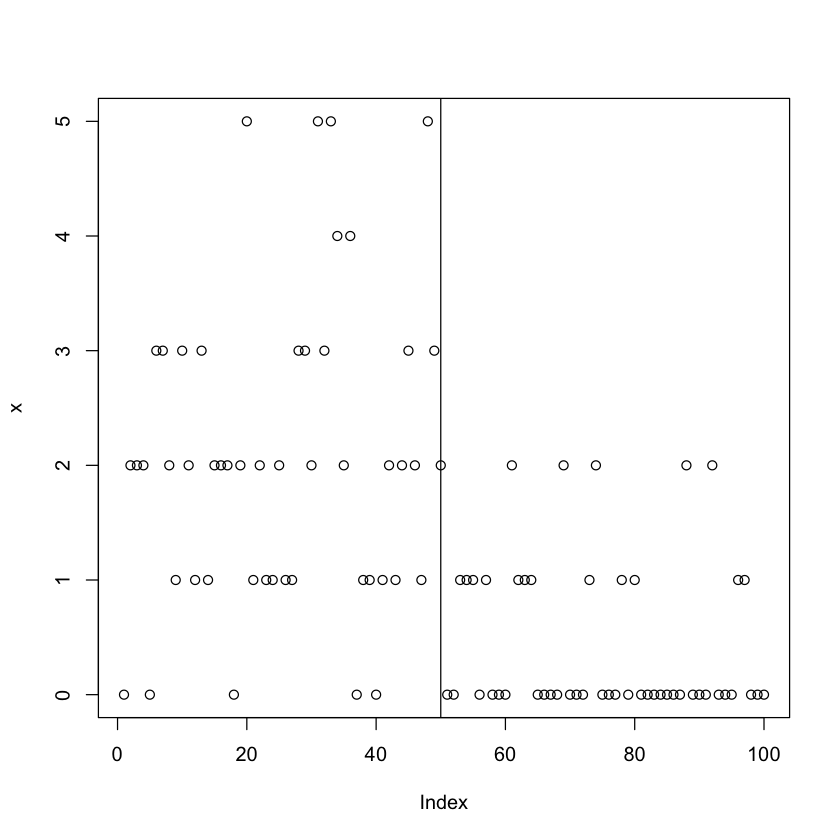

In [94]:
plot(x)
abline(v = 50)

Now, we will start to construct the Gibbs sampler. We want the Gibbs sampler to estimate $n$ (the location of the changepoint), the pre-changepoint lambda value ($\lambda_{1}$), and the post changepoint lambda value ($\lambda_{2}$). We must give the change starting values for each of the three parameters that it is trying to estimate.

In [74]:
n_0 <- sample((1:N),1) #initial n value
lambda1_0 <- rgamma(1, shape = 1, scale = 1.0/b) #initial lambda1 value
lambda2_0 <- rgamma(1, shape = 1, scale = 1.0/b) #initial lambda2 value

We will need three empty lists to store the chain estimates of the three parameters: ($n, \lambda_{1}, \lambda_{2}$). This will have as many instances as the number of iterations that we choose to run.

In [96]:
# Gibbs sampler
E <- 3100 #the number of iterations that the Gibbs sampler will perform
BURN_IN <- 100

path_n <- rep(0, E - BURN_IN)
path_lambda1 <- rep(0, E - BURN_IN)
path_lambda2 <- rep(0, E - BURN_IN)

In [ ]:
i_lambda1 <- c()
i_lambda2 <- c()

for (i in (1:E)) {#for each planned iteration
    i_lambda1[i] <- rgamma(a + sum(x[1:n]), shape = 1, scale = 1.0/(n + b))
    i_lambda2[i] <- rgamma(a + sum(x[n:N]), shape = 1, scale = 1.0/((N-n) + b))
}

Warning message:
In i_lambda1[i] <- rgamma(a + sum(x[1:n]), shape = 1, scale = 1/(n + : number of items to replace is not a multiple of replacement lengthWarning message:
In i_lambda2[i] <- rgamma(a + sum(x[n:N]), shape = 1, scale = 1/((N - : number of items to replace is not a multiple of replacement lengthWarning message:
In i_lambda1[i] <- rgamma(a + sum(x[1:n]), shape = 1, scale = 1/(n + : number of items to replace is not a multiple of replacement lengthWarning message:
In i_lambda2[i] <- rgamma(a + sum(x[n:N]), shape = 1, scale = 1/((N - : number of items to replace is not a multiple of replacement lengthWarning message:
In i_lambda1[i] <- rgamma(a + sum(x[1:n]), shape = 1, scale = 1/(n + : number of items to replace is not a multiple of replacement lengthWarning message:
In i_lambda2[i] <- rgamma(a + sum(x[n:N]), shape = 1, scale = 1/((N - : number of items to replace is not a multiple of replacement lengthWarning message:
In i_lambda1[i] <- rgamma(a + sum(x[1:n]), shape = 1, sc

In [99]:
sum(x[1:n]

[1] 102

In this case, the Gibbs Sampler is used to estimate three independent parameters of the generating distribution.